In [3]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
from scipy.ndimage import gaussian_filter
from scipy import spatial
from sklearn.neighbors import KDTree
from scipy.stats import circmean, circstd
import os
import sys
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sys,time,random
import matplotlib

sys.path.append('../defect_functions') 
from defect_pairs import * 
from average_flows import * 

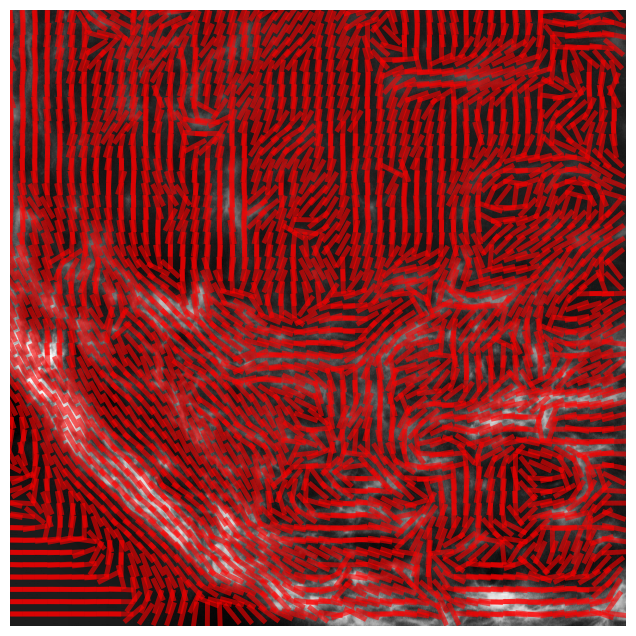

In [5]:
%matplotlib inline
im_num = 100
fig, ax1 = plt.subplots(1,1,  figsize=(8,8))

ax1.clear(); ax1.axis('off') 

im = r"C:\Users\victo\Downloads\reorientationorderanalysis\t12z6_1.tif"

img1 = cv2.imread(im)[:1000,:1000,0]

y, x = np.mgrid[0:img1.shape[0], 0:img1.shape[1]]

sigma = 15
ori, plus, min = analyze_defects(img1, sigma=sigma)

s = 20
# ax1.imshow(np.zeros_like(img1, dtype=np.float32), cmap="gray")
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img1)
ax1.imshow(img_clahe, cmap="gray")  

ax1.quiver(x[::s,::s], y[::s,::s],
    np.cos(ori)[::s,::s], np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, width=.008, 
    color="r", scale=25, pivot='mid', alpha=.6)
    
plt.gca().set_box_aspect(1)